In [68]:
import pandas as pd
from pymongo import MongoClient
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline



The purpose of this notebook is to perform EDA on a small sample of my data.

In [14]:
client = MongoClient('mongodb://localhost:27017/')
db = client['parsedA']
posts = db['posts']

In [15]:
cursor = posts.find()
df =  pd.DataFrame(list(cursor))
del df['_id']
df.tail()

,chic_points,comments,date,favorites,followers,garment_links,id,location,main_photo,photo_desc,post_id,style_council,subphotos,tags,title,username,votes
62,388,0,2008-05-10,3,0,None,1157,NaN,http://images2.chictopia.com/photos/lipstickgi...,\nI love the Etro S/S 08 look. as said in Vogu...,1157,Style_council,No Subphotos,"[Runway, Everyday, Summer]",Etro S/S 08,lipstickgirl,2
63,856,0,2008-05-10,1,18,[H&M t-shirt],1158,"Milano, Italy",http://images2.chictopia.com/photos/loulouisa/...,"\nHung out with friends today, having a BBQ an...",1158,Style_council,No Subphotos,"[Casual, Picnic, Summer]",just chilling,loulouisa,0
64,856,4,2008-05-10,0,18,[Zara dress],1159,"Milano, Italy",http://images2.chictopia.com/photos/loulouisa/...,\nWent clubbing with friends. Its already warm...,1159,Style_council,No Subphotos,"[Hippie, Casual Party, Summer]",Hippy-Happy Night Out,loulouisa,1
65,388,1,2008-05-10,0,0,"[beige, Witchery shirt]",1160,NaN,http://images2.chictopia.com/photos/annapelle/...,"\nLove the lame leggings, even though my boyfr...",1160,Style_council,No Subphotos,"[Casual, Art Opening, Summer]",My legs are fat,annapelle,0
66,388,0,2008-05-10,0,0,"[gray, Witchery shirt]",1161,NaN,http://images2.chictopia.com/photos/annapelle/...,\nThis skirt is one of those items youre glad ...,1161,Style_council,No Subphotos,"[Elegant, Work, Summer]",No shoes,annapelle,1


In [21]:
df.describe()


,chic_points,comments,favorites,followers,id,post_id,votes
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,5143.492537,2.462687,1.940299,7449.492537,1104.940299,1072.134328,10.089552
std,15655.628836,4.200752,6.203324,33334.793224,39.891854,193.614964,19.063476
min,0.000000,0.000000,0.000000,0.000000,1042.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.500000,1067.500000,1059.500000,0.000000
50%,569.000000,1.000000,0.000000,7.000000,1110.000000,1109.000000,2.000000
75%,889.000000,3.000000,1.000000,15.000000,1141.500000,1141.500000,8.500000
max,110256.000000,24.000000,40.000000,160155.000000,1161.000000,1161.000000,102.000000


In [33]:
df['desc_length'] = [len(desc) for desc in df['photo_desc'].values]


In [34]:
df['desc_length']

0       92
1       77
2       79
3       58
4       33
5       78
6       54
7      290
8      234
9       59
10     152
11     202
12     220
13     157
14     205
15      22
16     835
17      14
18      14
19      14
20      12
21       5
22      39
23     576
24     844
25      90
26      14
27    1703
28      41
29      41
      ... 
37     462
38     174
39      37
40     114
41      32
42      84
43      55
44      82
45      19
46     278
47     619
48     225
49     115
50     102
51      78
52     100
53     112
54     102
55      89
56     135
57     113
58      93
59     184
60     122
61     216
62     185
63     155
64     218
65     162
66     227
Name: desc_length, dtype: int64

In [42]:
df = df.drop('post_len', axis=1)
df = df.drop('id', axis=1)

In [46]:
df['num_subphotos'] = [0 if entry=='No Subphotos' else len(entry) for entry in df['subphotos']]

In [47]:
df.describe()

,chic_points,comments,favorites,followers,post_id,votes,desc_length,num_subphotos
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,5143.492537,2.462687,1.940299,7449.492537,1072.134328,10.089552,206.552239,0.417910
std,15655.628836,4.200752,6.203324,33334.793224,193.614964,19.063476,368.258485,0.872983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,422.000000,0.000000,0.000000,0.500000,1059.500000,0.000000,54.500000,0.000000
50%,569.000000,1.000000,0.000000,7.000000,1109.000000,2.000000,102.000000,0.000000
75%,889.000000,3.000000,1.000000,15.000000,1141.500000,8.500000,200.000000,0.000000
max,110256.000000,24.000000,40.000000,160155.000000,1161.000000,102.000000,2356.000000,3.000000


In [49]:
lin = LinearRegression()

In [52]:
test = df.sample(frac=0.15)
train_and_cross_val = df.loc[~df.index.isin(test.index)]

In [54]:
cross_val = train_and_cross_val.sample(frac=0.2)
train = train_and_cross_val.loc[~train_and_cross_val.index.isin(cross_val.index)]

In [55]:
type(train)

pandas.core.frame.DataFrame

In [58]:
len(train)

46

In [59]:
model = lin.fit(train[['desc_length', 'num_subphotos']], train['favorites'])

/Users/claremariemyers/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [61]:
model.coef_


array([-0.00045473, -0.23566063])

In [62]:
model.intercept_

1.467033360757295

In [63]:
y_preds = model.predict(cross_val[['desc_length', 'num_subphotos']])
y_preds

array([ 1.4583934 ,  0.97888691,  1.46066708,  0.69262021,  1.45202712,
        1.37381275,  1.39336634,  1.3679012 ,  1.41883149,  1.3769959 ,
        1.39564002])

In [64]:
model.score(cross_val[['desc_length', 'num_subphotos']], cross_val['favorites'])

-0.084296714636253878

In [65]:
cross_val['favorites']

45     0
39     1
26     0
27    19
4      0
14     0
65     0
64     0
34     0
31     0
13     0
Name: favorites, dtype: int64

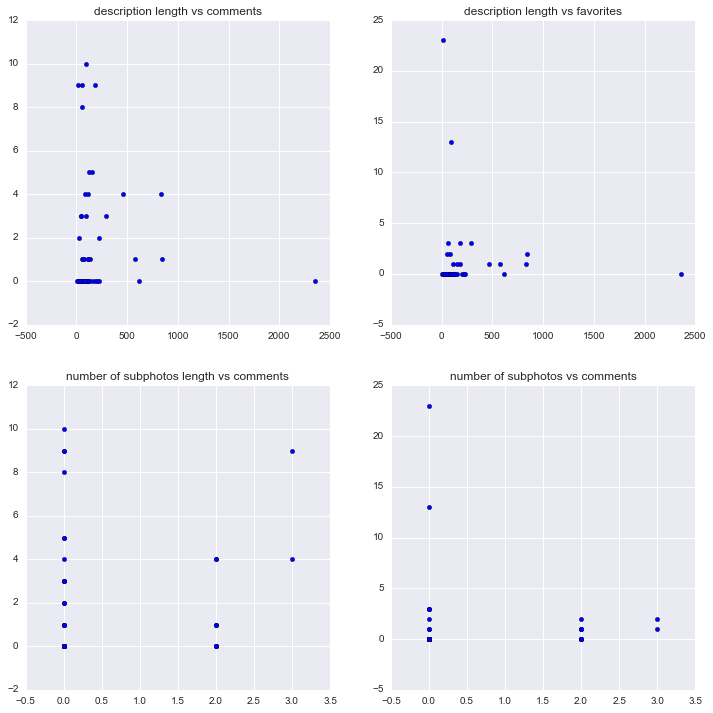

In [82]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
ax1.scatter(train['desc_length'], train['comments'])
ax1.set_title('description length vs comments')
ax2.scatter(train['desc_length'], train['favorites'])
ax2.set_title('description length vs favorites')
ax3.scatter(train['num_subphotos'], train['comments'])
ax3.set_title('number of subphotos length vs comments')
ax4.scatter(train['num_subphotos'], train['favorites'])
ax4.set_title('number of subphotos vs comments')


In [83]:
train.tail()


,chic_points,comments,date,favorites,followers,garment_links,location,main_photo,photo_desc,post_id,style_council,subphotos,tags,title,username,votes,desc_length,num_subphotos
59,8026,9,2008-05-10,1,482,None,NaN,http://images0.chictopia.com/photos/poppylee/1...,\nTook this photo for my blog when I got in fr...,1154,Style_icon,No Subphotos,"[Chic, Clubbing, Summer]",A bit drunk,kirstylee,20,184,0
60,1133,5,2008-05-10,0,25,"[hoodie, Marc by Marc Jacobs sweater]","Singapore, Singapore",http://images2.chictopia.com/photos/kokonzai2/...,\ni think i look quite funny here haha\nanyway...,1155,Style_council,No Subphotos,"[Eclectic, Everyday, Summer]",i look grumpy,kokonzai2,28,122,0
62,388,0,2008-05-10,3,0,None,NaN,http://images2.chictopia.com/photos/lipstickgi...,\nI love the Etro S/S 08 look. as said in Vogu...,1157,Style_council,No Subphotos,"[Runway, Everyday, Summer]",Etro S/S 08,lipstickgirl,2,185,0
63,856,0,2008-05-10,1,18,[H&M t-shirt],"Milano, Italy",http://images2.chictopia.com/photos/loulouisa/...,"\nHung out with friends today, having a BBQ an...",1158,Style_council,No Subphotos,"[Casual, Picnic, Summer]",just chilling,loulouisa,0,155,0
66,388,0,2008-05-10,0,0,"[gray, Witchery shirt]",NaN,http://images2.chictopia.com/photos/annapelle/...,\nThis skirt is one of those items youre glad ...,1161,Style_council,No Subphotos,"[Elegant, Work, Summer]",No shoes,annapelle,1,227,0


In [91]:
descriptions = df['photo_desc']
descriptions = [str(d).replace('\n',' ') for d in descriptions]
descriptions

[' Fall 2007 favourite  sequins and hippie-hair. Mostly vintage peices, H&M tanktop I suppose ',
 ' Going out! February 2008, I think Occasion? Swedish hip hop concert + club. ',
 '  seems kinda top-heavy? This one is Jonatans. But I want it. For myself. Now. ',
 ' Those slippers just complete this outfit dont you think? ',
 ' Me and my adoptive son Evert <3 ',
 ' I have come to the conclusion that I am absolutely useless with a self-timer ',
 ' Quite recent picture here, this was taken 1st of May ',
 ' I would imagine one of my pre-school teachers would wear something like this, back in the day. Im a big fan of primary colors and geometric patterns, thus when I thrifted this shirt, I was thrilled. Vintage shirt: thrifted Jumper: Fleamarket vendor Shoes: Fleamarket vendor Necklace: Etsy ',
 ' The shoes are old faves and the purse I thrifted after I swore that I would never thrift a bag again. Sunglasses: H&M Khaki shirt: Thrifted Tank: ? Pencil skirt: Thrifted Lace tights: Monoprix Sho